In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pisa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pisa.csv')
print(pisa.head())
print(len(pisa.index))

   punt_lec  horas  n_est
0    396.72    7.5     25
1    382.39    4.2     28
2    394.37    3.3     23
3    335.06    4.2     35
4    420.86    5.0     20
99


In [ ]:
X = np.array([pisa['horas'],pisa['n_est']]).T
Y = np.array(pisa['punt_lec']).reshape(-1,1)

In [ ]:
#statmodels to estimate the model
X = sm.add_constant(X)
lin_mod = sm.OLS(Y,X)
result = lin_mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     876.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.13e-62
Time:                        23:48:37   Log-Likelihood:                -349.13
No. Observations:                  99   AIC:                             704.3
Df Residuals:                      96   BIC:                             712.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        486.0782      3.412    142.480      0.0

In [ ]:
#load toy dataframe
curva = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/curva.csv')
print(curva.head())

          Y         X
0  0.314409 -2.109098
1  1.016197 -2.092655
2  1.920933 -2.063055
3  1.513532 -2.036740
4  0.596101 -2.009291


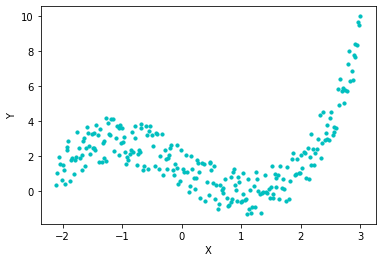

In [ ]:
#scatter plot
plt.scatter(curva['X'], curva['Y'], color = 'c', marker = 'o', s = 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Prepare the data
X = np.array([curva['X']]).T
Y = np.array(curva['Y']).reshape(-1,1)

In [ ]:
#Estimate a simple linear regression
X = sm.add_constant(X)
lin_model = sm.OLS(Y,X)
result = lin_model.fit()
print(result.params)

[1.88837611 0.24638396]


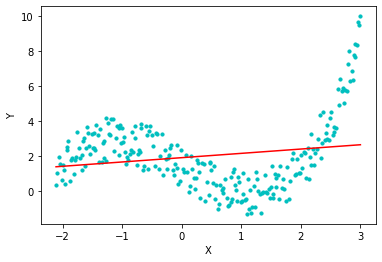

In [ ]:
#Goodness of fit ot the linear regression, too much bias, low variance
plt.scatter(curva['X'], curva['Y'], color = 'c', marker = 'o', s = 10)
y_pred = result.params[0] + result.params[1]*curva['X']
plt.plot(curva['X'], y_pred, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#reduce the bias increase the variance with a squared polynomial
curva['X2'] = curva['X']**2
print(curva.head())

          Y         X        X2
0  0.314409 -2.109098  4.448294
1  1.016197 -2.092655  4.379207
2  1.920933 -2.063055  4.256195
3  1.513532 -2.036740  4.148309
4  0.596101 -2.009291  4.037252


In [ ]:
#estimate the square polynomial regression
X = np.array([curva['X'], curva['X2']]).T
Y = np.array(curva['Y']).reshape(-1,1)

In [ ]:
X = sm.add_constant(X)
lin_model = sm.OLS(Y,X)
result = lin_model.fit()
print(result.params)

[ 0.53039157 -0.34930962  0.67397152]


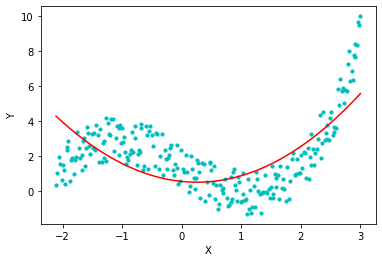

In [ ]:
#goodness of fit
plt.scatter(curva['X'], curva['Y'], color = 'c', marker = 'o', s = 10)
y_pred = result.params[0] + result.params[1]*curva['X'] + result.params[2]*curva['X2']
plt.plot(curva['X'], y_pred, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#less bias with square and cubic polynomials
curva['X3'] = curva['X']**3
print(curva.head())

          Y         X        X2        X3
0  0.314409 -2.109098  4.448294 -9.381889
1  1.016197 -2.092655  4.379207 -9.164171
2  1.920933 -2.063055  4.256195 -8.780763
3  1.513532 -2.036740  4.148309 -8.449026
4  0.596101 -2.009291  4.037252 -8.112016


In [ ]:
#estimate the regression
X = np.array([curva['X'], curva['X2'], curva['X3']]).T
Y = np.array(curva['Y']).reshape(-1,1)

In [ ]:
X = sm.add_constant(X)
lin_model = sm.OLS(Y,X)
result = lin_model.fit()
print(result.params)

[ 1.41078265 -2.03346695 -0.02621816  0.50872222]


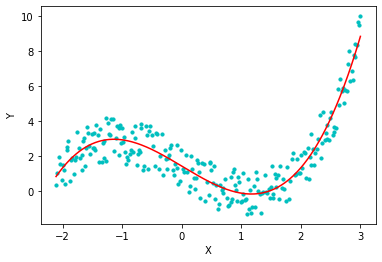

In [ ]:
#scatter plot less bias more variance better goodness of fit
plt.scatter(curva['X'], curva['Y'], color = 'c', marker = 'o', s = 10)
y_pred = result.params[0] + result.params[1]*curva['X'] + result.params[2]*curva['X2'] + result.params[3]*curva['X3']
plt.plot(curva['X'], y_pred, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()